In [707]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as m

from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit, \
                                    cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

%matplotlib inline

In [708]:
import warnings
warnings.filterwarnings('ignore')

In [709]:
train_C2H6 = pd.read_csv('train_data_C2H6.csv', header = 0, sep = ',')
train_C3H8 = pd.read_csv('train_data_C3H8.csv', header = 0, sep = ',')
train_iC4H10 = pd.read_csv('train_data_iC4H10.csv', header = 0, sep = ',')
train_nC4H10 = pd.read_csv('train_data_nC4H10.csv', header = 0, sep = ',')

In [710]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [711]:
train_C2H6

,B_rate,Re_A,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,sqrt_Pe_ef_C3H8,sqrt_Pe_ef_iC4H10,sqrt_Pe_ef_nC4H10,G_B_C2H6
0,71.591090,406691.601290,3.507886,28.822011,12.256473,16.885985,-2.242475,5.028694,0.032902,0.707197,0.938085,0.225533,0.561008,3.261401
1,71.707246,404402.122607,3.458369,28.179261,12.278466,17.072465,-1.218358,1.484397,0.004709,0.231491,0.650774,0.179067,0.449726,3.287555
2,71.811607,405816.722617,3.520068,28.198436,12.246353,17.025021,-0.395380,0.156325,0.007586,0.097052,0.691400,0.526302,0.825590,3.286083
3,71.904943,407882.237062,3.589369,28.473852,12.208397,16.906464,-0.463693,0.215011,0.013121,0.121494,0.644464,0.796202,1.282295,3.287569
4,71.996468,408308.687585,3.594282,28.625395,12.207304,16.856159,-0.794489,0.631212,0.020599,0.204350,1.572816,0.384088,0.865145,3.287977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5633,72.121189,413983.930391,3.572406,25.245525,11.661197,17.125750,0.584620,0.341780,0.016146,0.250456,0.676084,0.429058,0.676560,3.613900
5634,72.237662,414147.971365,3.565468,25.309821,11.678729,17.142614,0.542537,0.294347,0.015368,0.268782,0.615824,0.504972,0.680913,3.619171
5635,72.362225,414636.369811,3.567413,25.362570,11.692550,17.154685,0.520633,0.271058,0.013704,0.294229,0.617023,0.452487,0.708459,3.627698
5636,72.481486,415123.962871,3.570442,25.424037,11.707783,17.166859,0.518827,0.269181,0.011038,0.327344,0.602549,0.470335,0.728842,3.638930


In [712]:
col_C2H6 = [i for i in train_C2H6.drop('G_B_C2H6',axis=1).columns]

In [713]:
X_C2H6 = train_C2H6.drop('G_B_C2H6',1)
y_C2H6 = train_C2H6['G_B_C2H6']

scaler_C2H6 = StandardScaler()
scaler_C2H6.fit(X_C2H6, y_C2H6)
X_scaled_C2H6 = scaler_C2H6.transform(X_C2H6)

In [714]:
train_C3H8

,B_rate,Re_A,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,sqrt_Pe_ef_C3H8,sqrt_Pe_ef_iC4H10,sqrt_Pe_ef_nC4H10,e**Pe_ef_iC4H10,G_B_C3H8
0,71.591090,406691.601290,3.507886,28.822011,12.256473,16.885985,5.028694,0.032902,0.707197,0.938085,0.225533,0.561008,0.950407,27.603653
1,71.707246,404402.122607,3.458369,28.179261,12.278466,17.072465,1.484397,0.004709,0.231491,0.650774,0.179067,0.449726,0.968444,27.783881
2,71.811607,405816.722617,3.520068,28.198436,12.246353,17.025021,0.156325,0.007586,0.097052,0.691400,0.526302,0.825590,0.758059,27.734744
3,71.904943,407882.237062,3.589369,28.473852,12.208397,16.906464,0.215011,0.013121,0.121494,0.644464,0.796202,1.282295,0.530499,27.679363
4,71.996468,408308.687585,3.594282,28.625395,12.207304,16.856159,0.631212,0.020599,0.204350,1.572816,0.384088,0.865145,0.862842,27.624403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5633,72.121189,413983.930391,3.572406,25.245525,11.661197,17.125750,0.341780,0.016146,0.250456,0.676084,0.429058,0.676560,0.831860,25.788062
5634,72.237662,414147.971365,3.565468,25.309821,11.678729,17.142614,0.294347,0.015368,0.268782,0.615824,0.504972,0.680913,0.774919,25.830453
5635,72.362225,414636.369811,3.567413,25.362570,11.692550,17.154685,0.271058,0.013704,0.294229,0.617023,0.452487,0.708459,0.814856,25.881397
5636,72.481486,415123.962871,3.570442,25.424037,11.707783,17.166859,0.269181,0.011038,0.327344,0.602549,0.470335,0.728842,0.801544,25.950659


In [715]:
col_C3H8 = [i for i in train_C3H8.drop('G_B_C3H8',axis=1).columns]

In [716]:
X_C3H8 = train_C3H8.drop('G_B_C3H8',1)
y_C3H8 = train_C3H8['G_B_C3H8']

scaler_C3H8 = StandardScaler()
scaler_C3H8.fit(X_C3H8, y_C3H8)
X_scaled_C3H8 = scaler_C3H8.transform(X_C3H8)

In [717]:
train_iC4H10

,B_rate,Re_A,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,sqrt_Pe_ef_C3H8,sqrt_Pe_ef_iC4H10,sqrt_Pe_ef_nC4H10,e**Pe_ef_iC4H10,G_B_iC4H10
0,71.591090,406691.601290,3.507886,28.822011,12.256473,16.885985,5.028694,0.032902,0.707197,0.938085,0.225533,0.561008,0.950407,12.325097
1,71.707246,404402.122607,3.458369,28.179261,12.278466,17.072465,1.484397,0.004709,0.231491,0.650774,0.179067,0.449726,0.968444,12.365565
2,71.811607,405816.722617,3.520068,28.198436,12.246353,17.025021,0.156325,0.007586,0.097052,0.691400,0.526302,0.825590,0.758059,12.360900
3,71.904943,407882.237062,3.589369,28.473852,12.208397,16.906464,0.215011,0.013121,0.121494,0.644464,0.796202,1.282295,0.530499,12.351922
4,71.996468,408308.687585,3.594282,28.625395,12.207304,16.856159,0.631212,0.020599,0.204350,1.572816,0.384088,0.865145,0.862842,12.340423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5633,72.121189,413983.930391,3.572406,25.245525,11.661197,17.125750,0.341780,0.016146,0.250456,0.676084,0.429058,0.676560,0.831860,11.537228
5634,72.237662,414147.971365,3.565468,25.309821,11.678729,17.142614,0.294347,0.015368,0.268782,0.615824,0.504972,0.680913,0.774919,11.561665
5635,72.362225,414636.369811,3.567413,25.362570,11.692550,17.154685,0.271058,0.013704,0.294229,0.617023,0.452487,0.708459,0.814856,11.587488
5636,72.481486,415123.962871,3.570442,25.424037,11.707783,17.166859,0.269181,0.011038,0.327344,0.602549,0.470335,0.728842,0.801544,11.616500


In [718]:
col_iC4H10 = [i for i in train_iC4H10.drop('G_B_iC4H10',axis=1).columns]

In [719]:
X_iC4H10 = train_iC4H10.drop('G_B_iC4H10',1)
y_iC4H10 = train_iC4H10['G_B_iC4H10']

scaler_iC4H10 = StandardScaler()
scaler_iC4H10.fit(X_iC4H10, y_iC4H10)
X_scaled_iC4H10 = scaler_iC4H10.transform(X_iC4H10)

In [720]:
train_nC4H10

,B_rate,Re_A,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,sqrt_Pe_ef_C3H8,sqrt_Pe_ef_iC4H10,sqrt_Pe_ef_nC4H10,e**Pe_ef_iC4H10,G_B_nC4H10
0,71.591090,406691.601290,3.507886,28.822011,12.256473,16.885985,5.028694,0.032902,0.707197,0.938085,0.225533,0.561008,0.950407,17.367120
1,71.707246,404402.122607,3.458369,28.179261,12.278466,17.072465,1.484397,0.004709,0.231491,0.650774,0.179067,0.449726,0.968444,17.383997
2,71.811607,405816.722617,3.520068,28.198436,12.246353,17.025021,0.156325,0.007586,0.097052,0.691400,0.526302,0.825590,0.758059,17.373582
3,71.904943,407882.237062,3.589369,28.473852,12.208397,16.906464,0.215011,0.013121,0.121494,0.644464,0.796202,1.282295,0.530499,17.358515
4,71.996468,408308.687585,3.594282,28.625395,12.207304,16.856159,0.631212,0.020599,0.204350,1.572816,0.384088,0.865145,0.862842,17.339268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5633,72.121189,413983.930391,3.572406,25.245525,11.661197,17.125750,0.341780,0.016146,0.250456,0.676084,0.429058,0.676560,0.831860,17.644192
5634,72.237662,414147.971365,3.565468,25.309821,11.678729,17.142614,0.294347,0.015368,0.268782,0.615824,0.504972,0.680913,0.774919,17.685043
5635,72.362225,414636.369811,3.567413,25.362570,11.692550,17.154685,0.271058,0.013704,0.294229,0.617023,0.452487,0.708459,0.814856,17.726825
5636,72.481486,415123.962871,3.570442,25.424037,11.707783,17.166859,0.269181,0.011038,0.327344,0.602549,0.470335,0.728842,0.801544,17.763570


In [721]:
col_nC4H10 = [i for i in train_nC4H10.drop('G_B_nC4H10', axis=1).columns]

In [722]:
X_nC4H10 = train_nC4H10.drop('G_B_nC4H10',1)
y_nC4H10 = train_nC4H10['G_B_nC4H10']

scaler_nC4H10 = StandardScaler()
scaler_nC4H10.fit(X_nC4H10, y_nC4H10)
X_scaled_nC4H10 = scaler_nC4H10.transform(X_nC4H10)

## Кросс валидация

Обучение / тест

In [723]:
X_train_C2H6, X_test_C2H6, y_train_C2H6, y_test_C2H6 = train_test_split(
    X_scaled_C2H6, y_C2H6, test_size=0.2, shuffle=False, random_state=0)

In [724]:
X_train_C3H8, X_test_C3H8, y_train_C3H8, y_test_C3H8 = train_test_split(
    X_scaled_C3H8, y_C3H8, test_size=0.2, shuffle=False, random_state=0)

In [725]:
X_train_iC4H10, X_test_iC4H10, y_train_iC4H10, y_test_iC4H10 = train_test_split(
    X_scaled_iC4H10, y_iC4H10, test_size=0.2, shuffle=False, random_state=0)

In [726]:
X_train_nC4H10, X_test_nC4H10, y_train_nC4H10, y_test_nC4H10 = train_test_split(
    X_scaled_nC4H10, y_nC4H10, test_size=0.2, shuffle=False, random_state=0)

Стратегии кросс-валидации

In [727]:
cv_strategy_KFold = KFold(n_splits=5, random_state=0, shuffle=False)
cv_strategy_TMS = TimeSeriesSplit(n_splits=5)

Загружаем метрику качества

In [728]:
scorer = metrics.make_scorer(metrics.mean_absolute_error)
scorerCV = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False)

# linear_regressor

### C2H6

In [729]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = linear_regressor.predict(X_test_C2H6)

In [730]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.3036864141394895

In [731]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.5232842363833414, max:1.4213619260366164, min:0.16861792228575032, std:0.4565450760450908


In [732]:
lr_scoring

array([0.26153653, 1.42136193, 0.41122937, 0.16861792, 0.35367543])

In [733]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:1.4747869922353, max:5.814355985878524, min:0.21612970116710212, std:2.177508224311195


In [734]:
lr_scoring

array([5.81435599, 0.72143607, 0.2161297 , 0.22346832, 0.39854488])

### C3H8

In [735]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = linear_regressor.predict(X_test_C3H8)

In [736]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.43175999269301035

In [737]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:1.036885424195984, max:2.0247159755924837, min:0.48621345595060683, std:0.5323118913293373


In [738]:
lr_scoring

array([0.77332223, 2.02471598, 1.11317926, 0.48621346, 0.7869962 ])

In [739]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:2.513410376680524, max:9.345635994804073, min:0.4116981006733746, std:3.429816759488639


In [740]:
lr_scoring

array([9.34563599, 1.34495011, 0.4116981 , 0.65395176, 0.81081592])

### iC4H10

In [741]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = linear_regressor.predict(X_test_iC4H10)

In [742]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.29189298482608095

In [743]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.5553341931308264, max:1.7918437002138554, min:0.15276714144046988, std:0.6236030000669127


In [744]:
lr_scoring

array([0.15276714, 1.7918437 , 0.27411231, 0.17516699, 0.38278083])

In [745]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:3.5192205899472873, max:16.272220616143457, min:0.1536130859716396, std:6.377752830484892


In [746]:
lr_scoring

array([16.27222062,  0.52182547,  0.15361309,  0.24701636,  0.40142742])

### nC4H10

In [747]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = linear_regressor.predict(X_test_nC4H10)

In [748]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.4388520057784764

In [749]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.591708009463971, max:1.6838568144277115, min:0.2523629854844308, std:0.5486630364717455


In [750]:
lr_scoring

array([0.26635879, 1.68385681, 0.37859879, 0.25236299, 0.37736267])

In [751]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:3.3673338322712603, max:15.159602427491128, min:0.23516797494497801, std:5.89783586248578


In [752]:
lr_scoring

array([15.15960243,  0.66881899,  0.35467885,  0.23516797,  0.41840092])

# lasso_regressor

### C2H6

In [753]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = lasso_regressor.predict(X_test_C2H6)

In [754]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.6870252109830225

In [755]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:0.7664816112006541, max:1.2814951783667874, min:0.33876773354772893, std:0.4039712288138457


In [756]:
ls_scoring

array([1.28149518, 1.22973646, 0.51971247, 0.46269621, 0.33876773])

In [757]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [758]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [759]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [760]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 1.4 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [761]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [762]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6670398626016398
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [763]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.5771206488036664

In [764]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [765]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 1.1 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [766]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [767]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6267415994288629
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [768]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.5771206488036664

### C3H8

In [769]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = lasso_regressor.predict(X_test_C3H8)

In [770]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.6230362492948422

In [771]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.6263517171826922, max:3.9133776407504506, min:0.3400921111125041, std:1.2242124513800936


In [772]:
ls_scoring

array([1.18339805, 3.91337764, 1.70573568, 0.34009211, 0.98915511])

In [773]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:2.5552048782733023, max:7.252714678891644, min:0.4490356987223733, std:2.6024140599653216


In [774]:
ls_scoring

array([7.25271468, 3.51443348, 0.5183315 , 0.4490357 , 1.04150903])

In [775]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [776]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [777]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [778]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.31 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [779]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [780]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.1554640747892888
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [781]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.6637911791814975

In [782]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [783]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.05 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [784]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [785]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.53412706009771
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [786]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.6637911791814975

### iC4H10

In [787]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = lasso_regressor.predict(X_test_iC4H10)

In [788]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.44240013120226734

In [789]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.2120213729529281, max:3.923749152696108, min:0.35606932139945974, std:1.3665680490329875


In [790]:
ls_scoring

array([0.58754093, 3.92374915, 0.82374989, 0.35606932, 0.36899757])

In [791]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.176148203142895, max:2.6850242786992427, min:0.22421715660496008, std:1.0659238021268416


In [792]:
ls_scoring

array([2.68502428, 2.25386453, 0.34213411, 0.22421716, 0.37550094])

In [793]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [794]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [795]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [796]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.45 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [797]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [798]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6717250040256864
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [799]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.29500564333682217

In [800]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [801]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.79 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [802]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [803]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.0623628713708597
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [804]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.29500564333682217

### nC4H10

In [805]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = lasso_regressor.predict(X_test_nC4H10)

In [806]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.568855817694994

In [807]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.1565920187881056, max:4.012215389307097, min:0.33305421489743264, std:1.4329936949360131


In [808]:
ls_scoring

array([0.41532745, 4.01221539, 0.67238437, 0.33305421, 0.34997868])

In [809]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.4911885236578049, max:3.6079957539967724, min:0.22835788140755856, std:1.481819702086833


In [810]:
ls_scoring

array([3.60799575, 2.96815642, 0.22835788, 0.27448743, 0.37694513])

In [811]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [812]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [813]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [814]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.49 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [815]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [816]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6571799461617075
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [817]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.39989158419583054

In [818]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [819]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.72 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [820]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [821]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.3959972644077259
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [822]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.39989158419583054

# Ridge regressor

### C2H6

In [823]:
ridge_regressor = linear_model.Ridge(random_state=0)
ridge_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = ridge_regressor.predict(X_test_C2H6)

In [824]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.3006205137225883

In [825]:
rd_scoring = cross_val_score(ridge_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.40369321109387857, max:0.8414293102999105, min:0.15441187915982038, std:0.23420148609842892


In [826]:
rd_scoring

array([0.26611797, 0.84142931, 0.39000706, 0.15441188, 0.36649984])

In [827]:
rd_scoring = cross_val_score(ridge_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.32143990006175516, max:0.444817160213043, min:0.1903403384739998, std:0.10207819136253149


In [828]:
rd_scoring

array([0.33949636, 0.44481716, 0.19034034, 0.21800963, 0.41453601])

In [829]:
ridge_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [830]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [831]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [832]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 1.72 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [833]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [834]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6670398626016398
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [835]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.5771206488036664

In [836]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [837]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 1.44 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [838]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [839]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6267415994288629
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [840]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.5771206488036664

### C3H8

In [841]:
ridge_regressor = linear_model.Ridge(random_state=0)
ridge_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = ridge_regressor.predict(X_test_C3H8)

In [842]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.4224058653738287

In [843]:
rd_scoring = cross_val_score(ridge_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.8908456916115709, max:1.280099569467795, min:0.4565134989712137, std:0.29004936350650995


In [844]:
rd_scoring

array([0.7584443 , 1.28009957, 1.13320924, 0.4565135 , 0.82596185])

In [845]:
rd_scoring = cross_val_score(ridge_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:1.4797611245199125, max:4.097249482347559, min:0.4169169552380863, std:1.341226751369982


In [846]:
rd_scoring

array([4.09724948, 1.32467861, 0.41691696, 0.70882576, 0.85113482])

In [847]:
ridge_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [848]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [849]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [850]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.28 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [851]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [852]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.1554640747892888
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [853]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.6637911791814975

In [854]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [855]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.15 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [856]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [857]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.53412706009771
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [858]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.6637911791814975

### iC4H10

In [859]:
ridge_regressor = linear_model.Ridge(random_state=0)
ridge_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = ridge_regressor.predict(X_test_iC4H10)

In [860]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.27591267922220775

In [861]:
rd_scoring = cross_val_score(ridge_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.3943497322319993, max:0.984432972717985, min:0.15376497230075348, std:0.3057740712106233


In [862]:
rd_scoring

array([0.15376497, 0.98443297, 0.27635656, 0.17688692, 0.38030724])

In [863]:
rd_scoring = cross_val_score(ridge_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.5385549684234645, max:1.0328500102871103, min:0.15578949837640518, std:0.3428251571963853


In [864]:
rd_scoring

array([1.03285001, 0.85202091, 0.1557895 , 0.26188184, 0.39023259])

In [865]:
ridge_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [866]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [867]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [868]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.17 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [869]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [870]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6717250040256864
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [871]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.29500564333682217

In [872]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [873]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.47 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [874]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [875]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.0623628713708597
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [876]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.29500564333682217

### nC4H10

In [877]:
ridge_regressor = linear_model.Ridge(random_state=0)
ridge_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = ridge_regressor.predict(X_test_nC4H10)

In [878]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.4260443099612577

In [879]:
rd_scoring = cross_val_score(ridge_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.4911001167274548, max:1.2004455256498958, min:0.24759004105174293, std:0.35870160203605167


In [880]:
rd_scoring

array([0.26061836, 1.20044553, 0.36849196, 0.24759004, 0.3783547 ])

In [881]:
rd_scoring = cross_val_score(ridge_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.6671748438798389, max:1.2864846178151677, min:0.2337933877907301, std:0.4215483832358763


In [882]:
rd_scoring

array([1.28648462, 1.05359438, 0.33605639, 0.23379339, 0.42594544])

In [883]:
ridge_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [884]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [885]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [886]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.28 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [887]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [888]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6571799461617075
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [889]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.39989158419583054

In [890]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [891]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.52 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [892]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [893]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.3959972644077259
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [894]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.39989158419583054

# SGDRegressor

### C2H6

In [895]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = SGD_regressor.predict(X_test_C2H6)

In [896]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.39202564968812936

In [897]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:0.4796481585164248, max:1.259262737861026, min:0.17682129135383262, std:0.39438147068107293


In [898]:
SGD_scoring

array([0.29315336, 1.25926274, 0.35965544, 0.17682129, 0.30934797])

In [899]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:1.2802929621562953, max:4.9710146670257, min:0.14558016455194198, std:1.8527224646449685


In [900]:
SGD_scoring

array([4.97101467, 0.6512819 , 0.28861996, 0.14558016, 0.34496812])

In [901]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [902]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [903]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [904]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 12.4 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [905]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=1, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [906]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.3383967190374853
{'tol': 1, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [907]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.3865171362969299

In [908]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [909]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 8.73 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [910]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.2, random_state=0,
             shuffle=False, tol=1.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [911]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.1939492753532481
{'tol': 1.5, 'power_t': 0.2, 'penalty': 'l1', 'eta0': 0.05, 'alpha': 0.001}


In [912]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.3979753974601145

### C3H8

In [913]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = SGD_regressor.predict(X_test_C3H8)

In [914]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.3268919305788755

In [915]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:1.0390222722977165, max:1.6764247791298146, min:0.3883383413832723, std:0.469406879217712


In [916]:
SGD_scoring

array([0.88693221, 1.67642478, 1.46466378, 0.38833834, 0.77875226])

In [917]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:7.924523538172279, max:35.90513084613714, min:0.5052385164918144, std:13.996585141854123


In [918]:
SGD_scoring

array([35.90513085,  1.71789638,  0.50523852,  0.67319686,  0.82115508])

In [919]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [920]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [921]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [922]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 16.1 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [923]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=1, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [924]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-2.625011244231867
{'tol': 1, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [925]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.6186031824001216

In [926]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [927]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 11.6 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [928]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [929]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-9.23992397512838
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [930]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.6186031824001216

### iC4H10

In [931]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = SGD_regressor.predict(X_test_iC4H10)

In [932]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.35018219117597493

In [933]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:0.9266323729349866, max:3.6750685595562707, min:0.1490768665412439, std:1.3756499945582341


In [934]:
SGD_scoring

array([0.14907687, 3.67506856, 0.27362881, 0.20152434, 0.33386329])

In [935]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:3.9532672420950865, max:18.366023143506915, min:0.16590417812479302, std:7.208844504219268


In [936]:
SGD_scoring

array([18.36602314,  0.68714828,  0.16590418,  0.17731127,  0.36994934])

In [937]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [938]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [939]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [940]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 13.5 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [941]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [942]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.401316906245801
{'tol': 0.5, 'power_t': 0.25, 'penalty': 'l1', 'eta0': 0.05, 'alpha': 0.001}


In [943]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.26074078695317

In [944]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [945]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 9.85 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [946]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=1, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [947]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-4.346299957621157
{'tol': 1, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [948]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.2739714810495055

### nC4H10

In [949]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = SGD_regressor.predict(X_test_nC4H10)

In [950]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.5600829410742864

In [951]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:1.1632014479511195, max:4.5540472647002055, min:0.2501256271960156, std:1.6962268652804477


In [952]:
SGD_scoring

array([0.25012563, 4.55404726, 0.3461886 , 0.27030112, 0.39534462])

In [953]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:5.530645636734006, max:25.639369394580623, min:0.30098253199279273, std:10.056646390964556


In [954]:
SGD_scoring

array([25.63936939,  0.91144153,  0.30098253,  0.37662328,  0.42481144])

In [955]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [956]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [957]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [958]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 14.7 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [959]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.2, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [960]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-2.026863852622311
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l1', 'eta0': 0.05, 'alpha': 0.001}


In [961]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.22906135878491488

In [962]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [963]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 11.1 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [964]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=1, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [965]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-6.127451745752646
{'tol': 1, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [966]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.24513491386059638

# GradientBoostingRegressor

### C2H6

In [967]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C2H6, y_train_C2H6)
predictions = estimator.predict(X_test_C2H6)

In [968]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.37820568485362976

In [969]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.3585183451951252, max:0.5963499042314708, min:0.16166094903815906, std:0.14396559345098023


In [970]:
GBR_scoring

array([0.5963499 , 0.27468946, 0.36637683, 0.16166095, 0.39351459])

In [971]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:0.5132930727600306, max:1.1598531470843694, min:0.19341650662173634, std:0.35176411005377684


In [972]:
GBR_scoring

array([1.15985315, 0.57026755, 0.19341651, 0.2178152 , 0.42511296])

In [973]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [974]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [975]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [976]:
#%%time
#randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

In [977]:
#randomized_grid_cv.best_estimator_

In [978]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [979]:
#predictions = randomized_grid_cv.predict(X_test_C2H6)
#metrics.mean_absolute_error(y_test_C2H6, predictions)

In [980]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [981]:
#%%time
#randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

In [982]:
#randomized_grid_cv.best_estimator_

In [983]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [984]:
#predictions = randomized_grid_cv.predict(X_test_C2H6)
#metrics.mean_absolute_error(y_test_C2H6, predictions)

### C3H8

In [985]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C3H8, y_train_C3H8)
predictions = estimator.predict(X_test_C3H8)

In [986]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.5315852243344953

In [987]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.8094848652209456, max:1.0710140935017844, min:0.4891868402419761, std:0.2002053707981829


In [988]:
GBR_scoring

array([0.78827355, 0.96299642, 1.07101409, 0.48918684, 0.73595342])

In [989]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:2.218991224851509, max:6.441244172748662, min:0.5645477738902381, std:2.2261027024673448


In [990]:
GBR_scoring

array([6.44124417, 2.52206954, 0.56454777, 0.7937516 , 0.77334304])

In [991]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [992]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [993]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [994]:
#%%time
#randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

In [995]:
#randomized_grid_cv.best_estimator_

In [996]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [997]:
#predictions = randomized_grid_cv.predict(X_test_C3H8)
#metrics.mean_absolute_error(y_test_C3H8, predictions)

In [998]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [999]:
#%%time
#randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

In [1000]:
#randomized_grid_cv.best_estimator_

In [1001]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1002]:
#predictions = randomized_grid_cv.predict(X_test_C3H8)
#metrics.mean_absolute_error(y_test_C3H8, predictions)

### iC4H10

In [1003]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_iC4H10, y_train_iC4H10)
predictions = estimator.predict(X_test_iC4H10)

In [1004]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.24815834822549038

In [1005]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.40700711014007196, max:0.8466251632095962, min:0.21361620035048243, std:0.22438108144867183


In [1006]:
GBR_scoring

array([0.32040145, 0.84662516, 0.30682209, 0.2136162 , 0.34757065])

In [1007]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:0.8685588541059126, max:2.362880477658144, min:0.17929045774608512, std:0.8277613140076171


In [1008]:
GBR_scoring

array([2.36288048, 1.17699734, 0.17929046, 0.27446511, 0.34916089])

In [1009]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1010]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [1011]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [1012]:
#%%time
#randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

In [1013]:
#randomized_grid_cv.best_estimator_

In [1014]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1015]:
#predictions = randomized_grid_cv.predict(X_test_iC4H10)
#metrics.mean_absolute_error(y_test_iC4H10, predictions)

In [1016]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [1017]:
#%%time
#randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

In [1018]:
#randomized_grid_cv.best_estimator_

In [1019]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1020]:
#predictions = randomized_grid_cv.predict(X_test_iC4H10)
#metrics.mean_absolute_error(y_test_iC4H10, predictions)

### nC4H10

In [1021]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_nC4H10, y_train_nC4H10)
predictions = estimator.predict(X_test_nC4H10)

In [1022]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.32535711426915553

In [1023]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.5014620746117937, max:1.2495769102805996, min:0.18139792127581145, std:0.38185582312847305


In [1024]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:1.3038967808960105, max:3.4102072917901585, min:0.34413017364873716, std:1.237976075089699


In [1025]:
GBR_scoring

array([3.41020729, 2.03726299, 0.37755926, 0.34413017, 0.35032419])

In [1026]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1027]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [1028]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [1029]:
#%%time
#randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

In [1030]:
#randomized_grid_cv.best_estimator_

In [1031]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1032]:
#predictions = randomized_grid_cv.predict(X_test_nC4H10)
#metrics.mean_absolute_error(y_test_nC4H10, predictions)

In [1033]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [1034]:
#%%time
#randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

In [1035]:
#randomized_grid_cv.best_estimator_

In [1036]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1037]:
#predictions = randomized_grid_cv.predict(X_test_nC4H10)
#metrics.mean_absolute_error(y_test_nC4H10, predictions)

# Prediction

In [1038]:
test_data = pd.read_csv('test_data.csv', header = 0, sep = ',')

In [1039]:
test_data

,B_rate,Cx_A_C2H6,Cx_A_C2H6**2,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10,Cx_A_iC4H10**2,Cx_A_nC4H10,Cx_A_nC4H10**2,G_A_C2H6,G_A_C3H8,G_A_C6H14,G_A_CH4,G_A_iC4H10,G_A_iC5H12,G_A_nC4H10,G_A_nC5H12,G_B_C2H6,G_B_C3H8,G_B_iC4H10,G_B_nC4H10,Pe_ef_C2H6,Pe_ef_C2H6**2,Pe_ef_C3H8,Pe_ef_C3H8**2,Pe_ef_iC4H10,Pe_ef_iC4H10**2,Pe_ef_nC4H10,Pe_ef_nC4H10**2,Re_A,e**Pe_ef_C2H6,e**Pe_ef_C3H8,e**Pe_ef_iC4H10,e**Pe_ef_nC4H10,sqrt_Pe_ef_C2H6,sqrt_Pe_ef_C3H8,sqrt_Pe_ef_iC4H10,sqrt_Pe_ef_nC4H10,timestamp,w_A,w_prev
0,72.601981,0.068488,0.004691,0.526622,0.277331,-0.091283,0.008333,0.596711,0.356064,3.569881,25.479712,4.466263,0.213048,11.724163,4.152003,17.183164,3.661481,3.648088,25.981607,11.638576,17.799919,0.07058,0.004981,0.381002,0.145163,0.259863,0.067529,0.543063,0.294918,415477.749614,0.931854,0.683176,0.771157,0.580966,0.265668,0.617254,0.509768,0.736928,2020-04-30 23:30:00,0.277036,0.276608
1,74.273009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.667959,26.297401,4.568047,0.191308,11.880148,4.068561,17.187507,3.528153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,419019.690291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-01 00:00:00,0.281026,NaN
2,74.167421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.660194,26.223466,4.534756,0.190859,11.845278,4.047247,17.129529,3.505918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,417716.031332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-01 00:30:00,0.280066,NaN
3,74.063703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.659918,26.255791,4.500369,0.191285,11.851348,4.017352,17.124160,3.475113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,417677.086653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-01 01:00:00,0.279884,NaN
4,73.985463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.673042,26.325080,4.457838,0.192301,11.848657,3.991482,17.105351,3.445699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,418092.480177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-01 01:30:00,0.279844,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,71.147451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.749937,27.047878,4.132746,0.081633,12.083220,3.131494,16.478626,2.564446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380844.777764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-22 21:30:00,0.268524,NaN
3981,71.256112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.756247,27.134846,4.207451,0.081756,12.122493,3.156155,16.548577,2.589827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382368.259444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-22 22:00:00,0.269746,NaN
3982,71.607384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.795420,27.581964,4.311932,0.083086,12.322751,3.219705,16.837526,2.645874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388821.338979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-22 22:30:00,0.274419,NaN
3983,72.582642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.863233,28.320698,4.442151,0.085586,12.650781,3.312669,17.297763,2.725052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,399288.163412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-22 23:00:00,0.281859,NaN


In [1040]:
rg_C2H6 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C2H6.fit(X_train_C2H6, y_train_C2H6)

rg_C3H8 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C3H8.fit(X_train_C3H8, y_train_C3H8)

rg_iC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_iC4H10.fit(X_train_iC4H10, y_train_iC4H10)

rg_nC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_nC4H10.fit(X_train_nC4H10, y_train_nC4H10)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=False, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1041]:
T=1

In [1042]:
for i in range(T,test_data.shape[0]):
    test_data.loc[[i], ["w_prev"]] = test_data.loc[i-T, "w_A"]
    test_data.loc[[i], ["Cx_A_C2H6"]] = test_data.loc[i-T,'G_B_C2H6'] - test_data.loc[i-T,'G_A_C2H6'] 
    test_data.loc[[i], ["Cx_A_C3H8"]] = test_data.loc[i-T,'G_B_C3H8'] - test_data.loc[i-T,'G_A_C3H8']
    test_data.loc[[i], ["Cx_A_iC4H10"]] = test_data.loc[i-T,'G_B_iC4H10'] - test_data.loc[i-T,'G_A_iC4H10']
    test_data.loc[[i], ["Cx_A_nC4H10"]] = test_data.loc[i-T,'G_B_nC4H10'] - test_data.loc[i-T,'G_A_nC4H10']
    #print(1)
    test_data.loc[[i], ["Cx_A_C2H6**2"]] = test_data.loc[i, "Cx_A_C2H6"]**2
    test_data.loc[[i], ["Cx_A_C3H8**2"]] = test_data.loc[i, "Cx_A_C3H8"]**2
    test_data.loc[[i], ["Cx_A_iC4H10**2"]] = test_data.loc[i, "Cx_A_iC4H10"]**2
    test_data.loc[[i], ["Cx_A_nC4H10**2"]] = test_data.loc[i, "Cx_A_nC4H10"]**2
    #print(2)
    a_C2H6 = (test_data.loc[i,'G_A_C2H6'] - test_data.loc[i-1,'G_A_C2H6']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_C2H6']
    E_C2H6 = a_C2H6 / test_data.loc[i,'Cx_A_C2H6**2']
    
    a_C3H8 = (test_data.loc[i,'G_A_C3H8'] - test_data.loc[i-1,'G_A_C3H8']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_C3H8']
    E_C3H8 = a_C3H8 / test_data.loc[i,'Cx_A_C3H8**2']
    
    a_iC4H10 = (test_data.loc[i,'G_A_iC4H10'] - test_data.loc[i-1,'G_A_iC4H10']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_iC4H10']
    E_iC4H10 = a_iC4H10 / test_data.loc[i,'Cx_A_iC4H10**2']
    
    a_nC4H10 = (test_data.loc[i,'G_A_nC4H10'] - test_data.loc[i-1,'G_A_nC4H10']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_nC4H10']
    E_nC4H10 = a_nC4H10 / test_data.loc[i,'Cx_A_nC4H10**2']
    
    test_data.loc[[i],['Pe_ef_C2H6']] = np.abs(test_data.loc[i,'w_prev'] / E_C2H6)
    test_data.loc[[i],['Pe_ef_C3H8']] = np.abs(test_data.loc[i,'w_prev'] / E_C3H8)
    test_data.loc[[i],['Pe_ef_iC4H10']] = np.abs(test_data.loc[i,'w_prev'] / E_iC4H10)
    test_data.loc[[i],['Pe_ef_nC4H10']] = np.abs(test_data.loc[i,'w_prev'] / E_nC4H10)
    
    test_data.loc[[i],['sqrt_Pe_ef_C2H6']] = np.sqrt(test_data.loc[i,'Pe_ef_C2H6'])
    test_data.loc[[i],['sqrt_Pe_ef_C3H8']] = np.sqrt(test_data.loc[i,'Pe_ef_C3H8'])
    test_data.loc[[i],['sqrt_Pe_ef_iC4H10']] = np.sqrt(test_data.loc[i,'Pe_ef_iC4H10'])
    test_data.loc[[i],['sqrt_Pe_ef_nC4H10']] = np.sqrt(test_data.loc[i,'Pe_ef_nC4H10'])
    
    test_data.loc[[i],['e**Pe_ef_C2H6']] = np.exp(-1 * test_data.loc[i,'Pe_ef_C2H6'])
    test_data.loc[[i],['e**Pe_ef_C3H8']] = np.exp(-1 * test_data.loc[i,'Pe_ef_C3H8'])
    test_data.loc[[i],['e**Pe_ef_iC4H10']] = np.exp(-1 * test_data.loc[i,'Pe_ef_iC4H10'])
    test_data.loc[[i],['e**Pe_ef_nC4H10']] = np.exp(-1 * test_data.loc[i,'Pe_ef_nC4H10'])
    
    #print(3)
    C2H6 = scaler_C2H6.transform(test_data.loc[[i],col_C2H6])
    C3H8 = scaler_C3H8.transform(test_data.loc[[i],col_C3H8])
    iC4H10 = scaler_iC4H10.transform(test_data.loc[[i],col_iC4H10])
    nC4H10 = scaler_nC4H10.transform(test_data.loc[[i],col_nC4H10])
    #print(4)
    test_data.loc[[i], ["G_B_C2H6"]] = rg_C2H6.predict(C2H6)
    test_data.loc[[i], ["G_B_C3H8"]] = rg_C3H8.predict(C3H8)
    test_data.loc[[i], ["G_B_iC4H10"]] = rg_iC4H10.predict(iC4H10)
    test_data.loc[[i], ["G_B_nC4H10"]] = rg_nC4H10.predict(nC4H10)
    #print(5)
    
    #Если не убирать шумы в исходных данных для сходимости алгоритма нужен следующий код:
    for j in ['G_B_C2H6','G_B_C3H8','G_B_iC4H10','G_B_nC4H10']:
        if test_data.loc[i,j] < 0:
            test_data.loc[[i],[j]] = test_data.loc[i-1,j]
            
    x = test_data.loc[[i], ["G_B_C2H6",'G_B_C3H8','G_B_iC4H10','G_B_nC4H10']]
    
    if abs(np.array(x).sum()) > test_data.loc[i, "B_rate"]:
        test_data.loc[[i], ["G_B_C2H6"]] = test_data.loc[:i, "G_B_C2H6"].mean()
        test_data.loc[[i], ["G_B_C3H8"]] = test_data.loc[:i, "G_B_C3H8"].mean()
        test_data.loc[[i], ["G_B_iC4H10"]] = test_data.loc[:i, "G_B_iC4H10"].mean()
        test_data.loc[[i], ["G_B_nC4H10"]] = test_data.loc[:i, "G_B_nC4H10"].mean()
        
    #print(i)

In [1043]:
test_data.head()

,B_rate,Cx_A_C2H6,Cx_A_C2H6**2,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10,Cx_A_iC4H10**2,Cx_A_nC4H10,Cx_A_nC4H10**2,G_A_C2H6,G_A_C3H8,G_A_C6H14,G_A_CH4,G_A_iC4H10,G_A_iC5H12,G_A_nC4H10,G_A_nC5H12,G_B_C2H6,G_B_C3H8,G_B_iC4H10,G_B_nC4H10,Pe_ef_C2H6,Pe_ef_C2H6**2,Pe_ef_C3H8,Pe_ef_C3H8**2,Pe_ef_iC4H10,Pe_ef_iC4H10**2,Pe_ef_nC4H10,Pe_ef_nC4H10**2,Re_A,e**Pe_ef_C2H6,e**Pe_ef_C3H8,e**Pe_ef_iC4H10,e**Pe_ef_nC4H10,sqrt_Pe_ef_C2H6,sqrt_Pe_ef_C3H8,sqrt_Pe_ef_iC4H10,sqrt_Pe_ef_nC4H10,timestamp,w_A,w_prev
0,72.601981,0.068488,0.004691,0.526622,0.277331,-0.091283,0.008333,0.596711,0.356064,3.569881,25.479712,4.466263,0.213048,11.724163,4.152003,17.183164,3.661481,3.648088,25.981607,11.638576,17.799919,0.070580,0.004981,0.381002,0.145163,0.259863,0.067529,0.543063,0.294918,415477.749614,0.931854,0.683176,0.771157,0.580966,0.265668,0.617254,0.509768,0.736928,2020-04-30 23:30:00,0.277036,0.276608
1,74.273009,0.078208,0.006116,0.501895,0.251899,-0.085587,0.007325,0.616754,0.380386,3.667959,26.297401,4.568047,0.191308,11.880148,4.068561,17.187507,3.528153,3.200465,26.849607,12.108011,17.316844,0.014151,NaN,0.072941,NaN,0.015342,NaN,0.601468,NaN,419019.690291,0.985949,0.929656,0.984775,0.548007,0.118957,0.270076,0.123863,0.775543,2020-05-01 00:00:00,0.281026,0.277036
2,74.167421,-0.467493,0.218550,0.552206,0.304931,0.227863,0.051922,0.129337,0.016728,3.660194,26.223466,4.534756,0.190859,11.845278,4.047247,17.129529,3.505918,3.268245,26.929325,11.953255,17.159894,0.441405,NaN,1.054709,NaN,0.500294,NaN,0.217333,NaN,417716.031332,0.643132,0.348294,0.606352,0.804662,0.664383,1.026990,0.707315,0.466190,2020-05-01 00:30:00,0.280066,0.281026
3,74.063703,-0.391949,0.153624,0.705860,0.498238,0.107977,0.011659,0.030365,0.000922,3.659918,26.255791,4.500369,0.191285,11.851348,4.017352,17.124160,3.475113,3.237884,26.781476,11.982364,17.155723,0.390965,NaN,0.606660,NaN,0.089927,NaN,0.082380,NaN,417677.086653,0.676404,0.545169,0.913998,0.920922,0.625272,0.778884,0.299878,0.287019,2020-05-01 01:00:00,0.279884,0.280066
4,73.985463,-0.422033,0.178112,0.525685,0.276345,0.131016,0.017165,0.031563,0.000996,3.673042,26.325080,4.457838,0.192301,11.848657,3.991482,17.105351,3.445699,3.250816,26.737384,11.935970,17.093447,0.474788,NaN,0.357381,NaN,0.141391,NaN,0.027953,NaN,418092.480177,0.622017,0.699506,0.868150,0.972434,0.689048,0.597814,0.376020,0.167192,2020-05-01 01:30:00,0.279844,0.279884


In [1044]:
test_data.columns

Index(['B_rate', 'Cx_A_C2H6', 'Cx_A_C2H6**2', 'Cx_A_C3H8', 'Cx_A_C3H8**2',
       'Cx_A_iC4H10', 'Cx_A_iC4H10**2', 'Cx_A_nC4H10', 'Cx_A_nC4H10**2',
       'G_A_C2H6', 'G_A_C3H8', 'G_A_C6H14', 'G_A_CH4', 'G_A_iC4H10',
       'G_A_iC5H12', 'G_A_nC4H10', 'G_A_nC5H12', 'G_B_C2H6', 'G_B_C3H8',
       'G_B_iC4H10', 'G_B_nC4H10', 'Pe_ef_C2H6', 'Pe_ef_C2H6**2', 'Pe_ef_C3H8',
       'Pe_ef_C3H8**2', 'Pe_ef_iC4H10', 'Pe_ef_iC4H10**2', 'Pe_ef_nC4H10',
       'Pe_ef_nC4H10**2', 'Re_A', 'e**Pe_ef_C2H6', 'e**Pe_ef_C3H8',
       'e**Pe_ef_iC4H10', 'e**Pe_ef_nC4H10', 'sqrt_Pe_ef_C2H6',
       'sqrt_Pe_ef_C3H8', 'sqrt_Pe_ef_iC4H10', 'sqrt_Pe_ef_nC4H10',
       'timestamp', 'w_A', 'w_prev'],
      dtype='object')

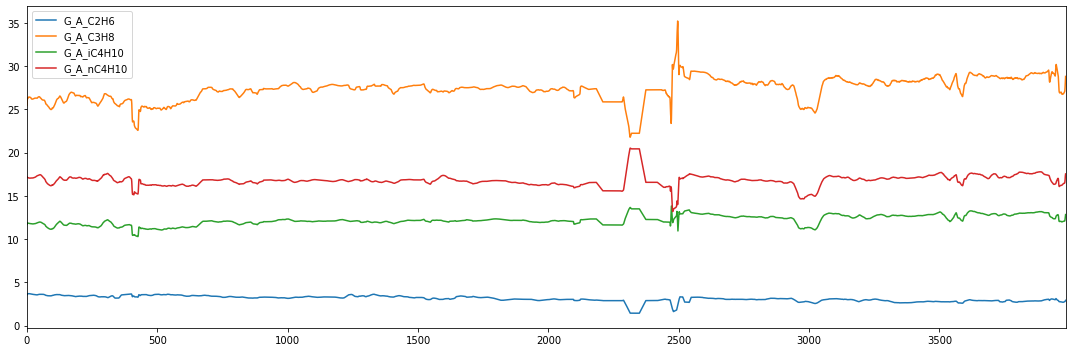

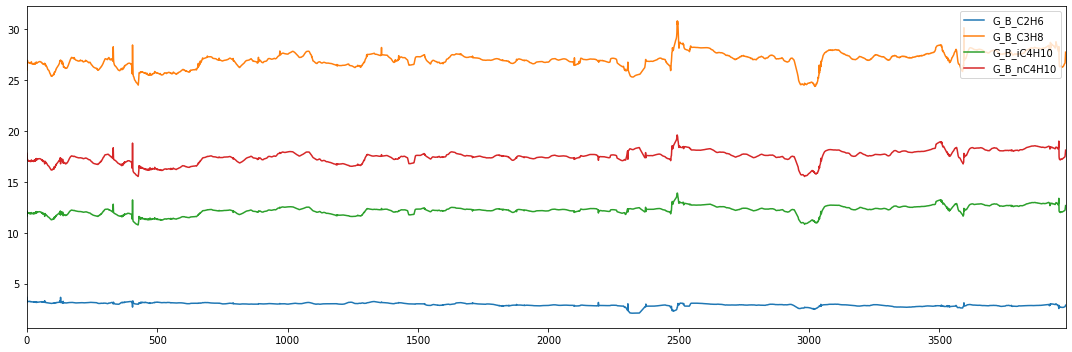

In [1045]:
plt.rcParams["figure.figsize"] = (15,5)

test_data[['G_A_C2H6', 'G_A_C3H8','G_A_iC4H10', 'G_A_nC4H10']][:].plot()

# make room for tick labels
plt.tight_layout()

plt.rcParams["figure.figsize"] = (15,5)

test_data[['G_B_C2H6', 'G_B_C3H8','G_B_iC4H10', 'G_B_nC4H10']][:].plot()

# make room for tick labels
plt.tight_layout()


plt.show()

In [1046]:
predict = pd.DataFrame()

In [1047]:
predict[['timestamp']] = test_data[['timestamp']]

In [1048]:
B = pd.DataFrame({'B_C2H6':[],'B_C3H8':[],'B_iC4H10':[], 'B_nC4H10':[]})

In [1049]:
for i in range(test_data.shape[0]):
    new_line = {}
    B_C2H6 = test_data.loc[i,'G_B_C2H6'] * 100 / test_data.loc[i,'B_rate']
    B_C3H8 = test_data.loc[i,'G_B_C3H8'] * 100 / test_data.loc[i,'B_rate']
    B_iC4H10 = test_data.loc[i,'G_B_iC4H10'] * 100 / test_data.loc[i,'B_rate']
    B_nC4H10 = test_data.loc[i,'G_B_nC4H10'] * 100 / test_data.loc[i,'B_rate']
    
    new_line.update({'B_C2H6':B_C2H6,'B_C3H8':B_C3H8,'B_iC4H10':B_iC4H10,'B_nC4H10': B_nC4H10})
    B = B.append(new_line, ignore_index=True)

In [1050]:
predict = pd.concat([predict,B] , axis=1)

In [1051]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-04-30 23:30:00,5.024778,35.786361,16.030659,24.517125
1,2020-05-01 00:00:00,4.309056,36.149885,16.302034,23.315123
2,2020-05-01 00:30:00,4.406578,36.308834,16.116584,23.136701
3,2020-05-01 01:00:00,4.371756,36.160056,16.178456,23.163469
4,2020-05-01 01:30:00,4.393857,36.138700,16.132858,23.103791
...,...,...,...,...,...
3980,2020-07-22 21:30:00,3.824168,37.385841,17.110428,24.491316
3981,2020-07-22 22:00:00,3.827730,37.399569,17.113496,24.493488
3982,2020-07-22 22:30:00,3.835441,37.267939,17.106824,24.473300
3983,2020-07-22 23:00:00,3.867220,37.391339,17.150994,24.519261


In [1052]:
for i in range(0,1):
    predict.drop(i, axis=0, inplace=True)

In [1053]:
predict = predict.reset_index(drop=True)

In [1054]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.309056,36.149885,16.302034,23.315123
1,2020-05-01 00:30:00,4.406578,36.308834,16.116584,23.136701
2,2020-05-01 01:00:00,4.371756,36.160056,16.178456,23.163469
3,2020-05-01 01:30:00,4.393857,36.138700,16.132858,23.103791
4,2020-05-01 02:00:00,4.400248,36.110771,16.116763,23.073062
...,...,...,...,...,...
3979,2020-07-22 21:30:00,3.824168,37.385841,17.110428,24.491316
3980,2020-07-22 22:00:00,3.827730,37.399569,17.113496,24.493488
3981,2020-07-22 22:30:00,3.835441,37.267939,17.106824,24.473300
3982,2020-07-22 23:00:00,3.867220,37.391339,17.150994,24.519261


In [1055]:
predict.to_csv('predictSGD.csv', sep=',', header=True, index=False)

In [1056]:
a = pd.read_csv('sample_submission.csv', header = 0, sep = ',')
b = pd.read_csv('predictSGD.csv', header = 0, sep = ',')

In [1057]:
a

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.363701,37.742757,16.843028,24.171264
1,2020-05-01 00:30:00,4.363701,37.742757,16.843028,24.171264
2,2020-05-01 01:00:00,4.363701,37.742757,16.843028,24.171264
3,2020-05-01 01:30:00,4.363701,37.742757,16.843028,24.171264
4,2020-05-01 02:00:00,4.363701,37.742757,16.843028,24.171264
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.363701,37.742757,16.843028,24.171264
3980,2020-07-22 22:00:00,4.363701,37.742757,16.843028,24.171264
3981,2020-07-22 22:30:00,4.363701,37.742757,16.843028,24.171264
3982,2020-07-22 23:00:00,4.363701,37.742757,16.843028,24.171264


In [1058]:
b

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.309056,36.149885,16.302034,23.315123
1,2020-05-01 00:30:00,4.406578,36.308834,16.116584,23.136701
2,2020-05-01 01:00:00,4.371756,36.160056,16.178456,23.163469
3,2020-05-01 01:30:00,4.393857,36.138700,16.132858,23.103791
4,2020-05-01 02:00:00,4.400248,36.110771,16.116763,23.073062
...,...,...,...,...,...
3979,2020-07-22 21:30:00,3.824168,37.385841,17.110428,24.491316
3980,2020-07-22 22:00:00,3.827730,37.399569,17.113496,24.493488
3981,2020-07-22 22:30:00,3.835441,37.267939,17.106824,24.473300
3982,2020-07-22 23:00:00,3.867220,37.391339,17.150994,24.519261


In [1059]:
#test_data.to_excel('123.xlsx')